In [1]:
#load files
import pandas as pd

df = pd.read_csv("Subject02/Subject02_Aufnahme000.csv", header = None)



In [2]:
#extract time features
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000
mean,32765.652541,32754.460140,32761.881799,33129.536288,32797.409482,33226.344861,37241.313525,34146.647183,26059.572333,29267.264166,29454.845592,29337.087189,31811.394057,28937.338691,29069.405423,29033.670726,33274.628673,36781.398928,35069.213184
std,433.822625,870.294872,226.999305,470.438965,1588.179139,1001.107135,1018.665637,1358.348576,2447.239967,2783.860674,12228.898727,5195.993694,185.595088,3403.586244,7303.666742,8579.071910,905.107704,1385.085615,1449.959324
min,28785.000000,26290.000000,30043.000000,28294.000000,13857.000000,31280.000000,33020.000000,27416.000000,19324.000000,18366.000000,80.000000,10856.000000,31312.000000,14229.000000,6546.000000,5501.000000,31384.000000,33132.000000,30873.000000
25%,32680.000000,32570.000000,32673.000000,33015.000000,32530.000000,32564.000000,36921.000000,33714.000000,25248.000000,27837.000000,28787.000000,27271.000000,31675.000000,27438.000000,25656.000000,25059.000000,32801.000000,36314.000000,34260.000000
50%,32775.000000,32811.000000,32761.000000,33157.000000,32795.000000,33080.000000,37137.000000,34386.000000,27192.000000,29224.000000,32300.000000,29680.000000,31816.000000,29232.000000,29420.000000,29472.000000,33112.000000,37104.000000,34644.000000
75%,32859.000000,33095.000000,32851.000000,33287.000000,33066.000000,33724.000000,37348.000000,34757.000000,27741.000000,30622.000000,35361.000000,32169.000000,31950.000000,30834.000000,31972.000000,33374.000000,33508.000000,37288.000000,35718.000000
max,36269.000000,36733.000000,37546.000000,36593.000000,56237.000000,38578.000000,49216.000000,37168.000000,28360.000000,39724.000000,56676.000000,46381.000000,32357.000000,39568.000000,61216.000000,63496.000000,40032.000000,46304.000000,39284.000000


In [8]:
#we need only 9,10,11 column corresponding to ACCELEROMETER LOWER X,Y,Z


df = df.drop([0,1,2,3,4,5,6,7,8,12,13,14,15,16,17,18], axis=1)

In [9]:
df.columns

Int64Index([9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')

In [11]:
df = df.drop([12,13,14,15,16,17,18], axis=1)

In [14]:
df.head(20)

,AX,AY,AZ
0,29068,29264,28408
1,29068,29264,28408
2,29068,29264,28408
3,29068,29264,28408
4,29068,29264,28408
5,29068,29264,28408
6,29068,29264,28408
7,29068,29264,28408
8,29068,29264,28408
9,29068,29264,28408


In [13]:
df.columns = ["AX","AY","AZ"]

In [18]:
df = df.iloc[::10]

In [55]:
df.columns.values

array(['AX', 'AY', 'AZ'], dtype=object)

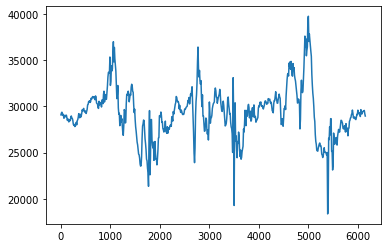

In [79]:
#plot df

%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(df.index, df["AX"])


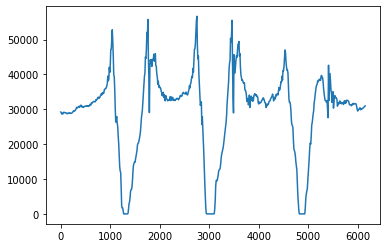

In [80]:
plt.plot(df.index, df["AY"])


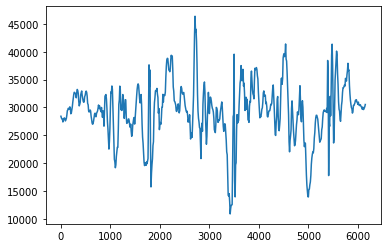

In [81]:
plt.plot(df.index, df["AZ"])


In [82]:
#sampled at 100Hz
#to make a window of 1 sec, without overlap, we need 100 readings in one window

def extract_features(df, file_name):
    
    stats_list = [file_name]    
    

    #Mean, variance, mean absolute deviation and root mean square are statistical indicators which give information about sample distribution.
    #mean
    stats_list.extend(df.mean().tolist())

    #variance
    stats_list.extend(df.var().tolist())

    #mean absolute deviation
    stats_list.extend(df.mad().tolist())

    #root mean square
    rms = np.sqrt((df**2).sum()/len(df))
    stats_list.extend(rms.tolist())

    #iqr. It measures the spread of a data set over a range
    stats_list.extend((df.quantile(0.75) - df.quantile(0.25)).tolist())

    #75th percentile (PE)
    stats_list.extend(df.quantile(0.75).tolist())

    #kurtosis (peakedness of the distribution)
    stats_list.extend(df.kurtosis().tolist())

    #Max - Min
    stats_list.extend((df.max() - df.min()).tolist())

    #Signal magnitude area (normalized sum of accelerometer components)
#     sma = (df.abs().sum()).sum()/len(df)
#     stats_list.append(sma)
    
    return(stats_list)

In [108]:
#Make a dataframe

def split_and_process_file(df, file_name):    
    two_D_list = []
    
    #Split the df into 1sec windows (100 rows per window)
    window_size = 100

    for i in range(df.shape[0]//window_size):
        start_index = i*window_size
        end_index = start_index+window_size

        #call extract features function
        stats_list = extract_features(df[start_index:end_index], file_name)
        two_D_list.append(stats_list)
    
    return two_D_list


def process_file(df, file_name):
    
    #we need only 9,10,11 column corresponding to ACCELEROMETER LOWER X,Y,Z
    df = df.drop([0,1,2,3,4,5,6,7,8,12,13,14,15,16,17,18], axis=1)
    
    #name the columns appropriately (axis-wise)
    df.columns = ["AX","AY","AZ"]
    
    #Keep every 10th row as frequency of accelerometer data is 100Hz
    df = df.iloc[::10]    

    
    #generate a list for extracted_features column names
    features = ["mean", "var", "mad", "rms", "iqr", "PE", "kurtosis", "MM"]

    stats_list_header = ["file_name"]
   
    for feature in features:
        for col in df.columns.values:
            stats_list_header.append(col+"_"+feature)

    stats_list_header.append("SMA")


    #Make the df
    values = split_and_process_file(df, file_name)
    
    extracted_features_df = pd.DataFrame(values, columns = stats_list_header)
    
    return extracted_features_df



In [104]:
# load files

def load_and_process_subject_files(subject, num_of_files):
    
    subject_features = pd.DataFrame()
    
    for i in range(num_of_files):
        num = f"{i:03d}"
        file = subject+"/"+subject+"_Aufnahme"+num+".csv"
        
        df = pd.read_csv(file, header=None)
                
        extracted_features_df = process_file(df, file)
        
        subject_features = subject_features.append(extracted_features_df, ignore_index = True)
        
    return subject_features


In [110]:
sub2_features = load_and_process_subject_files("Subject02", 440)

In [111]:
sub2_features.shape

(974, 23)

In [112]:
sub2_features.to_csv("sub2_features.csv", index=False)

In [2]:
import pandas as pd

dict = {'A': [1,2,3,4,5],
        'B': [2,4,6,8,10]
       }

df1 = pd.DataFrame(dict)

df1

,A,B
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [4]:
df1.mean()

A    3.0
B    6.0
dtype: float64

In [8]:
import numpy as np
rms = np.sqrt((df1**2).sum()/len(df1))

In [10]:
rms.tolist()

[3.3166247903554, 6.6332495807108]

In [11]:
#root mean square
    rms = lambda x: np.sqrt((x**2).sum()/len(x))
    

In [12]:
rms(df1).tolist()

[3.3166247903554, 6.6332495807108]